___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA 
(Waad and Noof)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [220]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [221]:
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [222]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [223]:
df_copy.shape

(6068, 110)

In [224]:
df_copy.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 110 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    index                           6068 non-null   int64  
 1    subjectid                       4082 non-null   float64
 2    abdominalextensiondepthsitting  6068 non-null   int64  
 3    acromialheight                  6068 non-null   int64  
 4    acromionradialelength           6068 non-null   int64  
 5    anklecircumference              6068 non-null   int64  
 6    axillaheight                    6068 non-null   int64  
 7    balloffootcircumference         6068 non-null   int64  
 8    balloffootlength                6068 non-null   int64  
 9    biacromialbreadth               6068 non-null   int64  
 10   bicepscircumferenceflexed       6068 non-null   int64  
 11   bicristalbreadth                6068 non-null   int64  
 12   bideltoidbreadth  

In [225]:
df_copy.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [226]:
df_copy.isnull().sum()

index                                0
subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
SubjectId                         4082
Length: 110, dtype: int64

In [227]:
df_copy.duplicated().sum()

0

## Explore Data

In [228]:
df_copy["WritingPreference"].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [229]:
df_copy["DODRace"].value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [230]:
df_copy = df_copy.groupby("DODRace").filter(lambda x: len(x) >= 500)


In [231]:
df_copy["DODRace"].value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [232]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [233]:
df_copy["DODRace"].value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [234]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [235]:
df_copy["SubjectsBirthLocation"].unique()

array(['North Dakota', 'New York', 'Wisconsin', 'North Carolina',
       'Kentucky', 'Mississippi', 'Romania', 'Arkansas', 'Maryland',
       'Arizona', 'South Carolina', 'California', 'Washington',
       'Virginia', 'Texas', 'Illinois', 'Puerto Rico', 'Georgia',
       'Colombia', 'El Salvador', 'Michigan', 'Missouri', 'Philippines',
       'Florida', 'Pennsylvania', 'West Virginia', 'Nebraska', 'Indiana',
       'Montana', 'Colorado', 'Mexico', 'Minnesota', 'Iowa', 'Peru',
       'Oklahoma', 'Massachusetts', 'District of Columbia', 'Ohio',
       'Louisiana', 'Oregon', 'Tennessee', 'Alaska', 'Connecticut',
       'Guam', 'Netherlands', 'Idaho', 'New Mexico', 'Belgium', 'Maine',
       'New Jersey', 'Morocco', 'Alabama', 'Canada', 'Germany', 'Hawaii',
       'Kansas', 'British Virgin Islands', 'Utah', 'US Virgin Islands',
       'Nevada', 'Delaware', 'Jamaica', 'Cameroon', 'New Hampshire',
       'Nicaragua', 'United Kingdom', 'Ukraine', 'Sierra Leone', 'Cuba',
       'Rhode Island',

In [236]:
# continent_dict = {
#     'North Dakota': 'North America',
#     'New York': 'North America',
#     'Wisconsin': 'North America',
#     'North Carolina': 'North America',
#     'Kentucky': 'North America',
#     'Mississippi': 'North America',
#     'Romania': 'Europe',
#     'Arkansas': 'North America',
#     'Maryland': 'North America',
#     'Arizona': 'North America',
#     'South Carolina': 'North America',
#     'California': 'North America',
#     'Washington': 'North America',
#     'Virginia': 'North America',
#     'Texas': 'North America',
#     'Illinois': 'North America',
#     'Puerto Rico': 'North America',
#     'Georgia': 'North America',
#     'Colombia': 'South America',
#     'El Salvador': 'North America',
#     'Michigan': 'North America',
#     'Missouri': 'North America',
#     'Philippines': 'Asia',
#     'Florida': 'North America',
#     'Pennsylvania': 'North America',
#     'West Virginia': 'North America',
#     'Nebraska': 'North America',
#     'Indiana': 'North America',
#     'Montana': 'North America',
#     'Colorado': 'North America',
#     'Mexico': 'North America',
#     'Minnesota': 'North America',
#     'Iowa': 'North America',
#     'Peru': 'South America',
#     'Oklahoma': 'North America',
#     'Massachusetts': 'North America',
#     'District of Columbia': 'North America',
#     'Ohio': 'North America',
#     'Louisiana': 'North America',
#     'Oregon': 'North America',
#     'Tennessee': 'North America',
#     'Alaska': 'North America',
#     'Connecticut': 'North America',
#     'Guam': 'Oceania',
#     'Vietnam': 'Asia',
#     'Hawaii': 'North America',
#     'Netherlands': 'Europe',
#     'Taiwan': 'Asia',
#     'Idaho': 'North America',
#     'New Mexico': 'North America',
#     'Belgium': 'Europe',
#     'Japan': 'Asia',
#     'Maine': 'North America',
#     'New Jersey': 'North America',
#     'Morocco': 'Africa',
#     'Alabama': 'North America',
#     'Canada': 'North America',
#     'Germany': 'Europe',
#     'Kansas': 'North America',
#     'South Korea': 'Asia',
#     'British Virgin Islands': 'North America',
#     'Utah': 'North America',
#     'US Virgin Islands': 'North America',
#     'Nevada': 'North America',
#     'Guyana': 'South America',
#     'Delaware': 'North America',
#     'Jamaica': 'North America',
#     'Cameroon': 'Africa',
#     'New Hampshire': 'North America',
#     'Nicaragua': 'North America',
#     'United Kingdom': 'Europe',
#     'Ukraine': 'Europe',
#     'Sierra Leone': 'Africa',
#     'Cuba': 'North America',
#     'Rhode Island': 'North America',
#     'Dominican Republic': 'North America',
#     'Nigeria': 'Africa',
#     'Barbados': 'North America',
#     'India': 'Asia',
#     'Palau': 'Oceania',
#     'Costa Rica': 'North America',
#     'Vermont': 'North America',
#     'Wyoming': 'North America',
#     'Bahamas': 'North America',
#     'Portugal': 'Europe',
#     'Ecuador': 'South America',
#     'France': 'Europe',
#     'Sudan': 'Africa',
#     'Belize': 'North America',
#     'Guadalupe': 'North America',
#     'South Dakota': 'North America',
#     'Nepal': 'Asia',
#     'Senegal': 'Africa',
#     'Haiti': 'North America',
#     'Brazil': 'South America',
#     'Cape Verde': 'Africa',
#     'Syria': 'Asia',
#     'Liberia': 'Africa',
#     'South Africa': 'Africa',
#     'Russia': 'Europe',
#     'Trinidad and Tobago': 'North America',
#     'Bolivia': 'South America',
#     'China': 'Asia',
#     'Singapore': 'Asia',
#     'Micronesia': 'Oceania',
#     'Kenya': 'Africa',
#     'Thailand': 'Asia',
#     'American Samoa': 'Oceania',
#     'French Guiana': 'South America',
#     'Iraq': 'Asia',
#     'Honduras': 'North America',
#     'Panama': 'North America',
#     'Ethiopia': 'Africa',
#     'Grenada': 'North America',
#     'Ghana': 'Africa',
#     'Egypt': 'Africa',
#     'Israel': 'Asia',
#     'Togo': 'Africa',
#     'Cambodia': 'Asia',
#     'Lebanon': 'Asia',
#     'Ivory Coast': 'Africa',
#     'Laos': 'Asia',
#     'Belarus': 'Europe',
#     'New Zealand': 'Oceania',
#     'South America': 'South America',
#     'Guatemala': 'North America',
#     'United States': 'North America',
#     'Poland': 'Europe',
#     'Iceland': 'Europe',
#     'Burma': 'Asia',
#     'Italy': 'Europe',
#     'Argentina': 'South America',
#     'Saint Lucia': 'North America',
#     'Dominica': 'North America',
#     'Turkey': 'Asia',
#     'Serbia': 'Europe',
#     'Zambia': 'Africa',
#     'Paraguay': 'South America',
#     'Chile': 'South America',
#     'Bulgaria': 'Europe',
#     'Antigua and Barbuda': 'North America',
#     'Korea': 'Asia',
#     'Sri Lanka': 'Asia',
#     'Bangladesh': 'Asia',
#     'Azerbaijan': 'Asia',
#     'Venezuela': 'South America',
#     'Fiji': 'Oceania',
#     'Northern Mariana Islands': 'Oceania',
#     'Iran': 'Asia',
#     'Bosnia and Herzegovina': 'Europe',
#     'Bermuda': 'North America',
#     'Denmark': 'Europe'
# }

In [237]:
# df_copy['SubjectsBirthLocation'] = df_copy['SubjectsBirthLocation'].map(continent_dict)

In [238]:
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,White,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,White,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,Black,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,White,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,Black,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,Hispanic,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,Hispanic,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,Black,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,Hispanic,31,63,133,Right hand,29511.000


<Axes: ylabel='SubjectsBirthLocation,DODRace'>

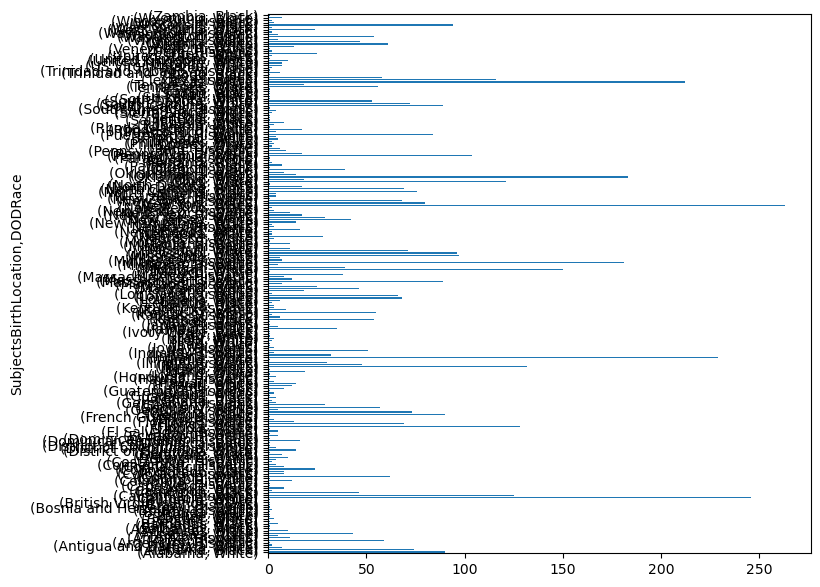

In [239]:
df_copy.groupby(["SubjectsBirthLocation"])["DODRace"].value_counts().plot(kind="barh", figsize=(7, 7))

In [240]:
ct = pd.crosstab(df_copy["SubjectsBirthLocation"], df_copy["DODRace"], margins=True, margins_name="Total", normalize='index')
ct


DODRace,Black,Hispanic,White
SubjectsBirthLocation,,,
Alabama,0.451,0.000,0.549
Alaska,0.000,0.000,1.000
Antigua and Barbuda,1.000,0.000,0.000
Argentina,0.000,1.000,0.000
Arizona,0.067,0.147,0.787
...,...,...,...
West Virginia,0.077,0.000,0.923
Wisconsin,0.030,0.020,0.949
Wyoming,0.000,0.000,1.000


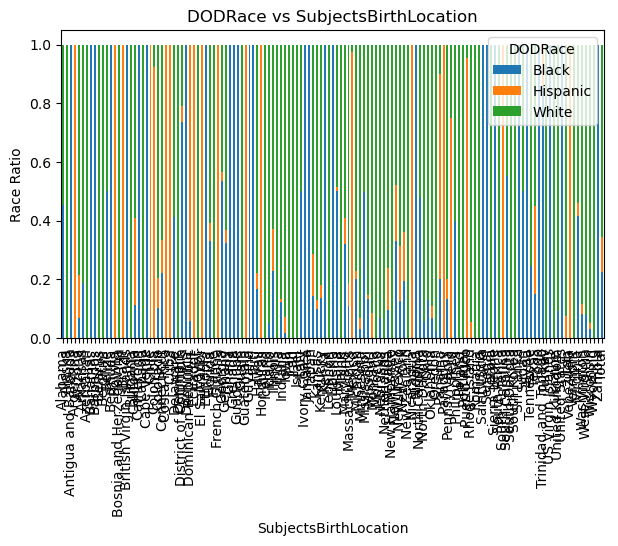

In [241]:
ct.plot(kind='bar', stacked=True)
plt.title('DODRace vs SubjectsBirthLocation')
plt.xlabel('SubjectsBirthLocation')
plt.ylabel('Race Ratio')
plt.show()

In [242]:
df_copy = df_copy.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "subjectid",
        "SubjectId",
        "Date",
        "Branch",
        "index",
        "Component",
    ],
    axis=1,
)

# "SubjectsBirthLocation"
# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

In [243]:
df_copy.isnull().sum().sum()

0

In [244]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

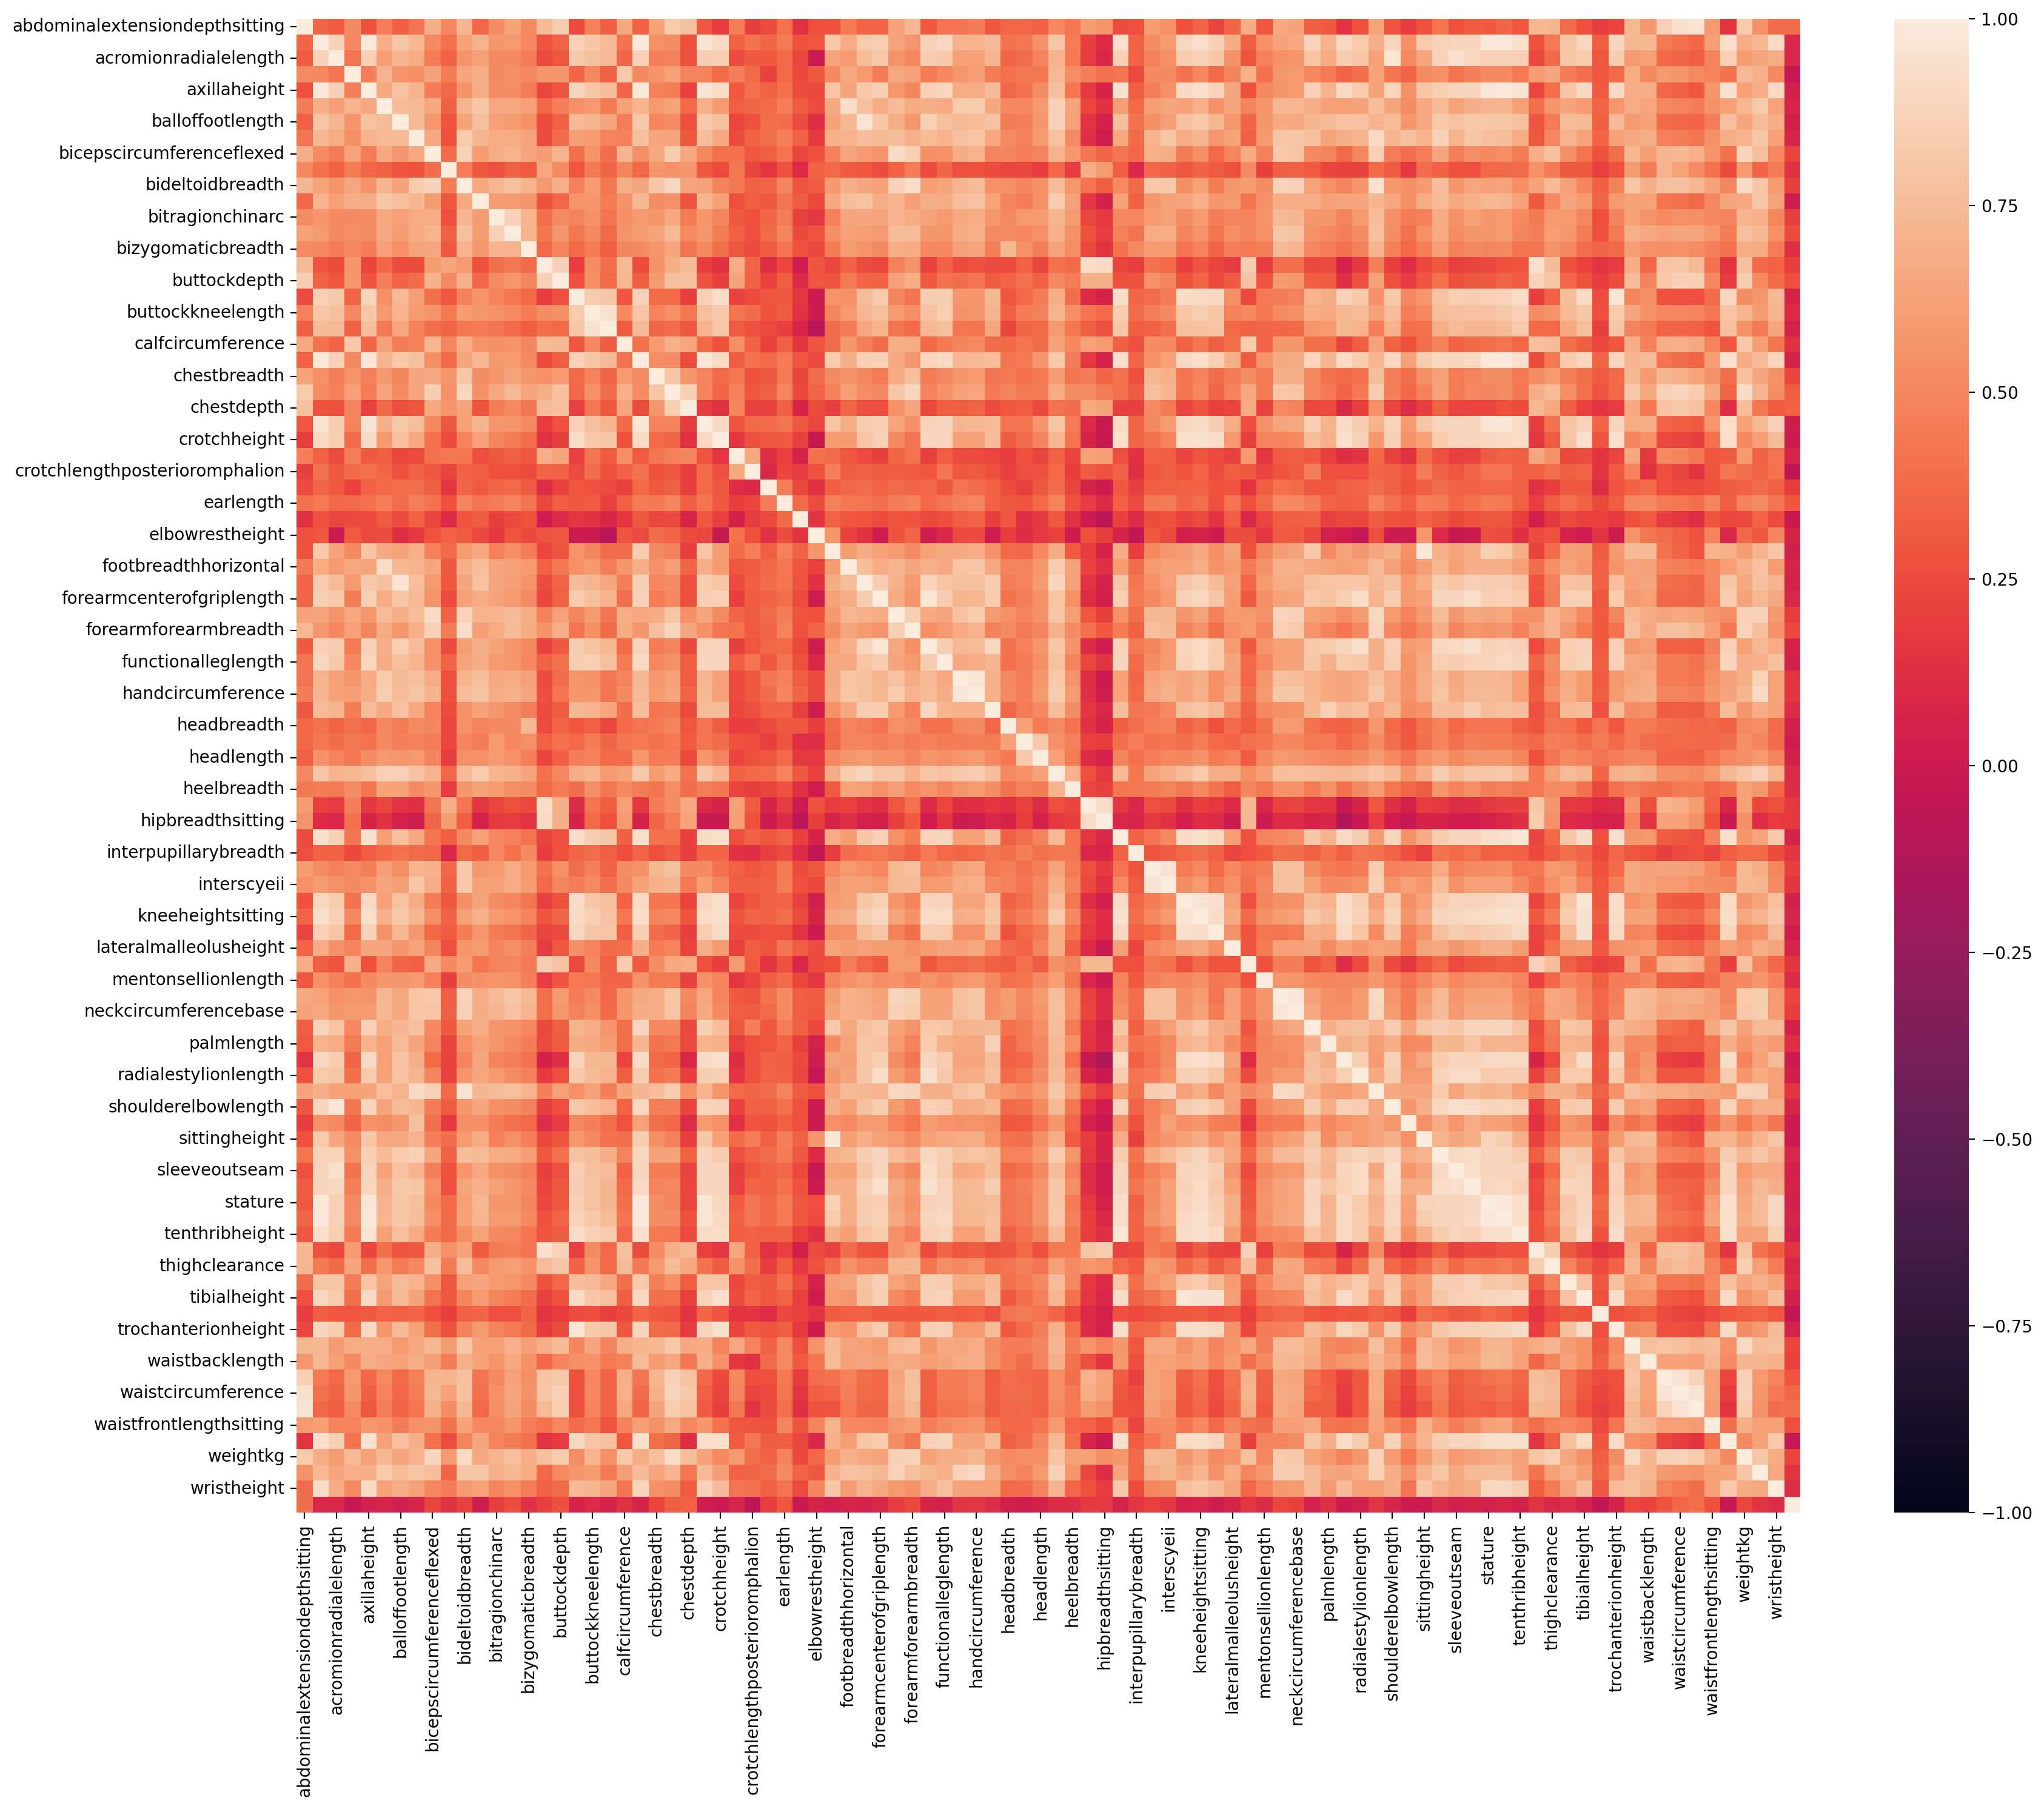

In [245]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1);

In [246]:
df_copy.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   abdominalextensiondepthsitting  5769 non-null   int64  
 1   acromialheight                  5769 non-null   int64  
 2   acromionradialelength           5769 non-null   int64  
 3   anklecircumference              5769 non-null   int64  
 4   axillaheight                    5769 non-null   int64  
 5   balloffootcircumference         5769 non-null   int64  
 6   balloffootlength                5769 non-null   int64  
 7   biacromialbreadth               5769 non-null   int64  
 8   bicepscircumferenceflexed       5769 non-null   int64  
 9   bicristalbreadth                5769 non-null   int64  
 10  bideltoidbreadth                5769 non-null   int64  
 11  bimalleolarbreadth              5769 non-null   int64  
 12  bitragionchinarc                5769 no


buttockheight
buttockkneelength
buttockpopliteallength
cervicaleheight
chestbreadth
chestheight
crotchheight
earlength
earprotrusion
elbowrestheight
eyeheightsitting
forearmcenterofgriplength
forearmforearmbreadth
forearmhandlength
handbreadth
handlength
headbreadth
headcircumference
headlength
heelbreadth
iliocristaleheight
interscyei
interscyeii
kneeheightmidpatella
kneeheightsitting 
lateralfemoralepicondyleheight
lateralmalleolusheight
neckcircumference
neckcircumferencebase
overheadfingertipreachsitting
palmlength
poplitealheight
radialestylionlength
shoulderelbowlength
sittingheight
sleevelengthspinewrist
sleeveoutseam
span
stature
suprasternaleheight
tenthribheight
thighcircumference
thighclearance
thumbtipreach
tibialheight  
tragiontopofhead                                  
trochanterionheight
verticaltrunkcircumferenceusa
waistbacklength
waistbreadth
waistcircumference
waistfrontlengthsitting 
waistheightomphalion
wristcircumference
wristheight
SubjectsBirthLocation
Age
Gender
                          
selected_columns = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength', 
                    'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight', '']
selected_df = df[selected_columns]

In [247]:
df_copy.shape

(5769, 98)

In [248]:
sorted_counts = df_copy['SubjectsBirthLocation'].value_counts()
filtered_values = sorted_counts.index[:107].tolist()
df_copy = df_copy[df_copy['SubjectsBirthLocation'].isin(filtered_values)]

In [249]:
df_copy['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California     417
New York       411
Texas          386
Indiana        264
Florida        210
              ... 
Argentina        1
Saint Lucia      1
Dominica         1
Serbia           1
Bermuda          1
Name: count, Length: 107, dtype: int64

In [250]:
df_copy.shape

(5740, 98)

In [251]:
for col in df_copy.columns[df_copy.dtypes == object]:
    # Get the unique values and their counts
    unique_values = df_copy[col].unique()
    unique_counts = df_copy[col].nunique()
    
    # Print the column name and the number of unique values
    print(f"{col} = {unique_counts} unique value(s)")
    

Gender = 2 unique value(s)
SubjectsBirthLocation = 107 unique value(s)
DODRace = 3 unique value(s)
WritingPreference = 3 unique value(s)


In [252]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5740 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   abdominalextensiondepthsitting  5740 non-null   int64  
 1   acromialheight                  5740 non-null   int64  
 2   acromionradialelength           5740 non-null   int64  
 3   anklecircumference              5740 non-null   int64  
 4   axillaheight                    5740 non-null   int64  
 5   balloffootcircumference         5740 non-null   int64  
 6   balloffootlength                5740 non-null   int64  
 7   biacromialbreadth               5740 non-null   int64  
 8   bicepscircumferenceflexed       5740 non-null   int64  
 9   bicristalbreadth                5740 non-null   int64  
 10  bideltoidbreadth                5740 non-null   int64  
 11  bimalleolarbreadth              5740 non-null   int64  
 12  bitragionchinarc                5740 no

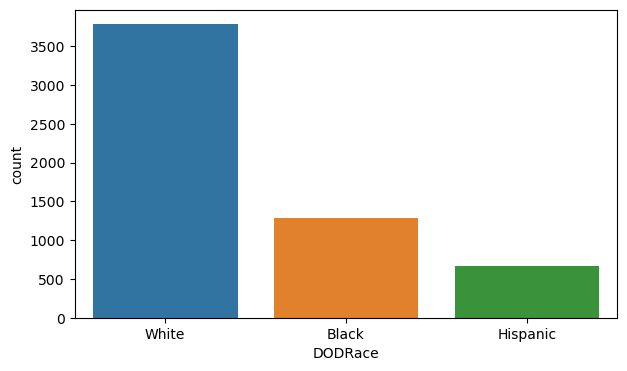

In [253]:
sns.countplot(data=df_copy, x='DODRace')

plt.show()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [254]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]
numerical_data = df_copy.select_dtypes(include='number')


In [255]:
df_copy["SubjectsBirthLocation"].nunique()

107

In [256]:
import sklearn

In [257]:
sklearn.__version__  # 1.3.1

'1.3.1'

In [258]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model
class weight__
(Afnan, Raya, Maram)


### Vanilla Logistic Model

In [259]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [260]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    remainder=StandardScaler(),
    verbose_feature_names_out=False,
    
)


In [261]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "LogisticRegression",
        LogisticRegression(),
    ),
]

pipe_model = Pipeline(steps=operations)

In [262]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [263]:
pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('LogisticRegression', LogisticRegression())])

In [264]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[241   5  12]
 [  9  68  57]
 [  9  26 721]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       258
    Hispanic       0.69      0.51      0.58       134
       White       0.91      0.95      0.93       756

    accuracy                           0.90      1148
   macro avg       0.84      0.80      0.82      1148
weighted avg       0.89      0.90      0.89      1148


Train_Set
[[ 968   10   51]
 [  25  328  185]
 [  30   73 2922]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94      1029
    Hispanic       0.80      0.61      0.69       538
       White       0.93      0.97      0.95      3025

    accuracy                           0.92      4592
   macro avg       0.89      0.84      0.86      4592
weighted avg       0.92      0.92      0.92      4592



### Cross validation

In [265]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [266]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "LogisticRegression",
        LogisticRegression(),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=15, n_jobs=-1, return_train_score=True,verbose =2
)
df_scores = pd.DataFrame(scores, index=range(1, 16))
df_scores.mean()[2:]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    6.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.1s finished


test_precision_Hispanic    0.742
train_precision_Hispanic   0.807
test_recall_Hispanic       0.563
train_recall_Hispanic      0.611
test_f1_Hispanic           0.638
train_f1_Hispanic          0.696
dtype: float64

### with balancing

In [267]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "LogisticRegression-b",
        LogisticRegression(class_weight="balanced", random_state=44),
    ),
]

pipe_model_b = Pipeline(steps=operations)

In [268]:
pipe_model_b.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('LogisticRegression-b',
                 LogisticRegression(class_weight='balanced', random_state=44))])

In [269]:
eval_metric(pipe_model_b, X_train, y_train, X_test, y_test)

Test_Set
[[242  10   6]
 [  7 105  22]
 [ 23  94 639]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       258
    Hispanic       0.50      0.78      0.61       134
       White       0.96      0.85      0.90       756

    accuracy                           0.86      1148
   macro avg       0.78      0.86      0.81      1148
weighted avg       0.89      0.86      0.87      1148


Train_Set
[[ 969   33   27]
 [  17  457   64]
 [  70  333 2622]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1029
    Hispanic       0.56      0.85      0.67       538
       White       0.97      0.87      0.91      3025

    accuracy                           0.88      4592
   macro avg       0.81      0.89      0.84      4592
weighted avg       0.91      0.88      0.89      4592



### Cross validation - with balancing

In [270]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "LogisticRegression_b",
        LogisticRegression(class_weight="balanced", random_state=44),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True , verbose =2

)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


test_precision_Hispanic    0.499
train_precision_Hispanic   0.555
test_recall_Hispanic       0.758
train_recall_Hispanic      0.854
test_f1_Hispanic           0.600
train_f1_Hispanic          0.672
dtype: float64

### Logistic Model GridsearchCV

In [271]:
from sklearn.model_selection import GridSearchCV
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

param_grid = {

    "LogisticRegression_gs__C": [0.01, 0.1, 0.001],
    "LogisticRegression_gs__penalty": ["l1", "l2"],
    "LogisticRegression_gs__solver": ["liblinear", "lbfgs"],
 
}

operations = [
    ("OneHotEncoder", column_trans),
    (
        "LogisticRegression_gs",
        LogisticRegression(class_weight="balanced"),
    ),
]

model = Pipeline(steps=operations)


model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose = 3
)

In [272]:
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('LogisticRegression_gs',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'LogisticRegression_gs__C': [0.01, 0.1, 0.001],
                         'LogisticRegression_gs__penalty': ['l1', 'l2'],
                         'LogisticRegression_gs__solver': ['liblinear',
                                                           'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [273]:
model_grid.best_params_

{'LogisticRegression_gs__C': 0.1,
 'LogisticRegression_gs__penalty': 'l2',
 'LogisticRegression_gs__solver': 'lbfgs'}

In [274]:
pd.DataFrame(model_grid.cv_results_).loc[
    model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.749
mean_train_score   0.827
Name: 7, dtype: object

In [275]:
eval_metric(model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  11   5]
 [ 10  98  26]
 [ 20  95 641]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       258
    Hispanic       0.48      0.73      0.58       134
       White       0.95      0.85      0.90       756

    accuracy                           0.85      1148
   macro avg       0.77      0.84      0.80      1148
weighted avg       0.88      0.85      0.86      1148


Train_Set
[[ 963   38   28]
 [  24  446   68]
 [  62  357 2606]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1029
    Hispanic       0.53      0.83      0.65       538
       White       0.96      0.86      0.91      3025

    accuracy                           0.87      4592
   macro avg       0.80      0.88      0.83      4592
weighted avg       0.90      0.87      0.88      4592



In [276]:
y_pred = model_grid.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'Black'],
      dtype=object)

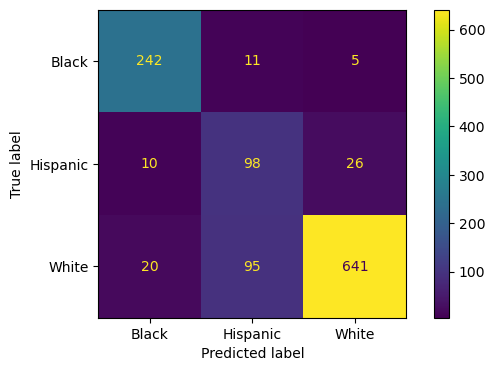

In [277]:
ConfusionMatrixDisplay.from_estimator(model_grid, X_test, y_test);

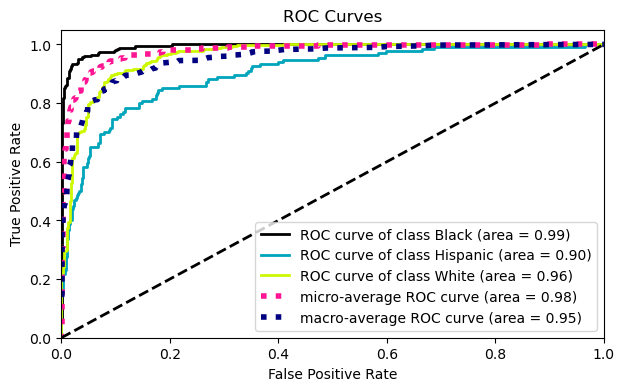

In [278]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(C=0.1, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

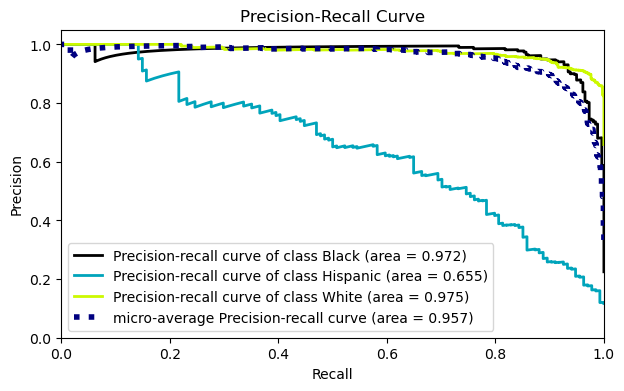

In [279]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(C=0.1, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [1]:
y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

NameError: name 'pd' is not defined

## 2. SVC
(Shahad, Marwa, Atheer, Reema, Rahaf)

### Vanilla SVC model 

In [280]:
from sklearn.svm import SVC



operations = [("encoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[237   0  21]
 [ 11  57  66]
 [ 10   8 738]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       258
    Hispanic       0.88      0.43      0.57       134
       White       0.89      0.98      0.93       756

    accuracy                           0.90      1148
   macro avg       0.90      0.77      0.81      1148
weighted avg       0.90      0.90      0.89      1148


Train_Set
[[ 944    4   81]
 [  21  265  252]
 [  12   18 2995]]
              precision    recall  f1-score   support

       Black       0.97      0.92      0.94      1029
    Hispanic       0.92      0.49      0.64       538
       White       0.90      0.99      0.94      3025

    accuracy                           0.92      4592
   macro avg       0.93      0.80      0.84      4592
weighted avg       0.92      0.92      0.91      4592



In [281]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

NameError: name 'f1_hispanic' is not defined

In [ ]:
#SVM with balancing

operations = [("encoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1,6))
df_scores.mean()[2:]

###  SVC Model GridsearchCV

In [ ]:
param_grid = {'SVC__C': [0.01, 0.03, 0.02, 0.1],
               'SVC__gamma': [0.03,0.01 ,0.1],
#               'SVC__kernel': ['rbf', 'linear'],
#               'SVC__class_weight': ["balanced", None]
#               'SVC__degree':[2,3]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=5,
                              return_train_score=True,
                              verbose=2)

In [ ]:
SVM_pipe_model_grid.fit(X_train, y_train)

## 3. RF
(Sarah-46, Norah, TAIF, Hibah, Salma)

### Vanilla RF Model

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

In [ ]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

In [ ]:
# with palanced
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
 

scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [ ]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe)
plt.show();


In [ ]:
pipe_model["RF_model"].feature_importances_

In [ ]:
features = pipe_model["encoder"].get_feature_names_out()
features



In [ ]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

In [ ]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [ ]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features, #features_names=X.columns
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);


In [ ]:
RF_model = RandomForestClassifier(random_state=101, 
                                  max_samples=0.5)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

In [ ]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

### RF Model GridsearchCV

In [ ]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

In [ ]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [ ]:
rf_grid_model.fit(X_train, y_train)

In [ ]:
rf_grid_model.best_estimator_

In [ ]:
rf_grid_model.best_score_

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

## 4. XGBoost All Features
(Hussam, Ammar)

### Vanilla XGBoost Model

In [ ]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [ ]:
df_copy["SubjectsBirthLocation"].nunique()

In [ ]:
import sklearn

In [ ]:
sklearn.__version__  # 1.3.1

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [ ]:
df_copy.shape

In [ ]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


In [ ]:
df_copy["DODRace"]

In [ ]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [ ]:
features

### CV XGBoost Model

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

### XGBoost Model GridsearchCV

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':1, 'black':2, 'hispanic': 3

# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate


pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

#### GridSearch

In [ ]:

# param_grid = {"xgboost__n_estimators":[50, 100, 200],
#               'xgboost__max_depth':[3,4,5],
#               "xgboost__learning_rate": [0.1, 0.2],
#               "xgboost__subsample":[0.5, 0.8, 1],
#               "xgboost__colsample_bytree":[0.5,0.7, 1],
#              "xgboost__reg_alpha": [0, 0.25, 0.5, 0.75, 1],
# }

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

In [ ]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

#### Random Serach

In [ ]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float   
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)



In [ ]:
# Print the best hyperparameters
print(random_search.best_params_)


In [ ]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

In [ ]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

###  XGBoost Partial Features
(Hussam, Ammar)

In [ ]:
# These features chosen one by one after looking in the box plots of each feature along with the ditrbution in each of the three clases


columns_to_keep = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength',
                   'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight',
                   'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestbreadth',
                   'chestheight', 'crotchheight', 'earlength', 'earprotrusion', 'elbowrestheight',
                   'eyeheightsitting', 'forearmcenterofgriplength', 'forearmforearmbreadth',
                   'forearmhandlength', 'handbreadth', 'handlength', 'headbreadth', 'headcircumference',
                   'headlength', 'heelbreadth', 'iliocristaleheight', 'interscyei', 'interscyeii',
                   'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight',
                   'lateralmalleolusheight', 'neckcircumference', 'neckcircumferencebase',
                   'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
                   'shoulderelbowlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span',
                   'stature', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance',
                   'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight',
                   'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference',
                   'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight',
                   'SubjectsBirthLocation', 'Age', 'Gender', 'WritingPreference', 'DODRace']

df_partial = df_copy[columns_to_keep]

In [ ]:
df_partial.shape

In [ ]:
display(df_partial.describe())
print("Number of nulls",df_partial.isnull().sum().sum())

In [ ]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_partial["DODRace"] = df_partial.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_partial["DODRace"]

In [ ]:
# Split the data
X = df_partial.drop(["DODRace"], axis=1)
y = df_partial["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
y

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

### CV XGBoost Model

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate



# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=5,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

#### Grid Serach of partial Features


In [ ]:

# param_grid = {"xgboost__n_estimators":[50, 100, 200],
#               'xgboost__max_depth':[3,4,5],
#               "xgboost__learning_rate": [0.1, 0.2],
#               "xgboost__subsample":[0.5, 0.8, 1],
#               "xgboost__colsample_bytree":[0.5,0.7, 1],
#              "xgboost__reg_alpha": [0, 0.25, 0.5, 0.75, 1],
# }

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

In [ ]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

#### Random Serach of partial Features


In [ ]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# Define the hyperparameter space
# param_grid = {
#     "xgboost__n_estimators": randint(30, 201),      # Integer
#     "xgboost__max_depth": randint(3, 11),           # Integer
#     "xgboost__learning_rate": uniform(0.001, 3),    # float
#     "xgboost__subsample": uniform(0.5, 1),          # float
#     "xgboost__colsample_bytree": uniform(0.5, 1),   # float
#     "xgboost__reg_alpha": uniform(0, 1),            # float
#     "xgboost__gamma": uniform(0, 11),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float   
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=500,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)



In [ ]:
# Print the best hyperparameters
print(random_search.best_params_)


In [ ]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

In [ ]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___